In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style
sns.set(style='whitegrid')

# Cell 2: Load dataset
df = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()


Matplotlib is building the font cache; this may take a moment.


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [2]:
# Cell 3: Basic info
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Shape: (3000, 10)

Data Types:
 Country                                 object
Year                                     int64
Attack Type                             object
Target Industry                         object
Financial Loss (in Million $)          float64
Number of Affected Users                 int64
Attack Source                           object
Security Vulnerability Type             object
Defense Mechanism Used                  object
Incident Resolution Time (in Hours)      int64
dtype: object

Missing Values:
 Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [3]:
# Cell 4: Target columns overview
classification_targets = ['Attack Type', 'Security Vulnerability Type', 'Defense Mechanism Used']
regression_targets = ['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)']

for col in classification_targets:
    print(f"\n{col} value counts:\n", df[col].value_counts())

df[regression_targets].describe()



Attack Type value counts:
 Attack Type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

Security Vulnerability Type value counts:
 Security Vulnerability Type
Zero-day              785
Social Engineering    747
Unpatched Software    738
Weak Passwords        730
Name: count, dtype: int64

Defense Mechanism Used value counts:
 Defense Mechanism Used
Antivirus             628
VPN                   612
Encryption            592
Firewall              585
AI-based Detection    583
Name: count, dtype: int64


,Financial Loss (in Million $),Incident Resolution Time (in Hours)
count,3000.000000,3000.000000
mean,50.492970,36.476000
std,28.791415,20.570768
min,0.500000,1.000000
25%,25.757500,19.000000
50%,50.795000,37.000000
75%,75.630000,55.000000
max,99.990000,72.000000


C:\Users\0WNER\AppData\Local\Temp\ipykernel_10568\3194552066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted')


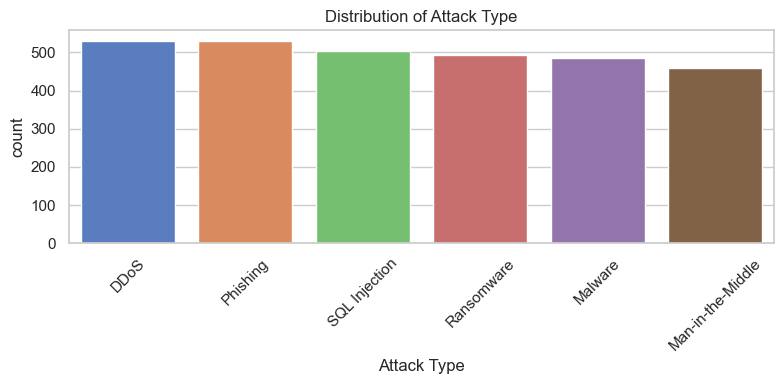

C:\Users\0WNER\AppData\Local\Temp\ipykernel_10568\3194552066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted')


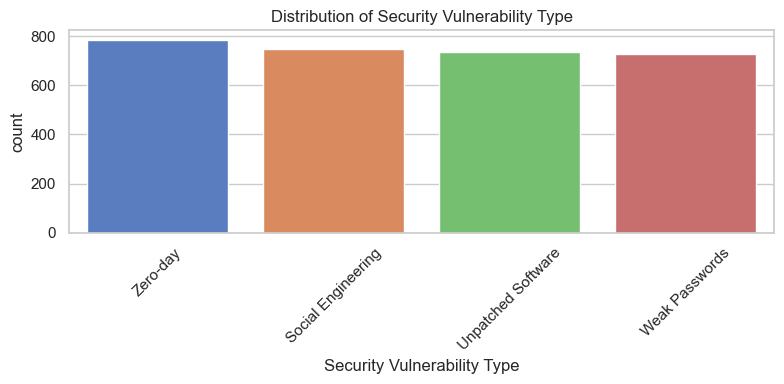

C:\Users\0WNER\AppData\Local\Temp\ipykernel_10568\3194552066.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted')


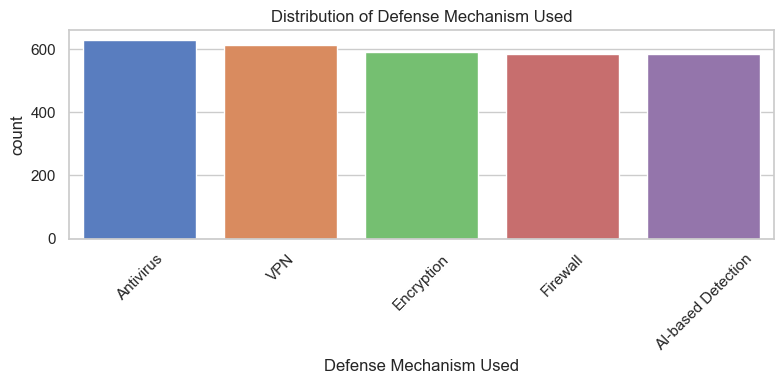

In [4]:
# Cell 5: Visualize categorical targets
for col in classification_targets:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='muted')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


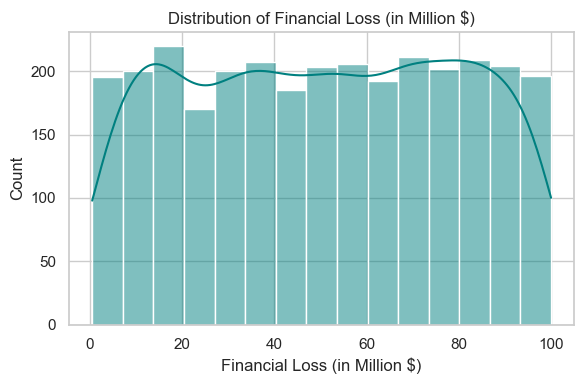

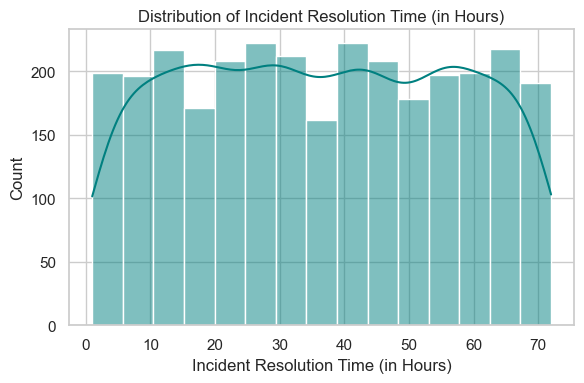

In [5]:
# Cell 6: Visualize numeric targets
for col in regression_targets:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

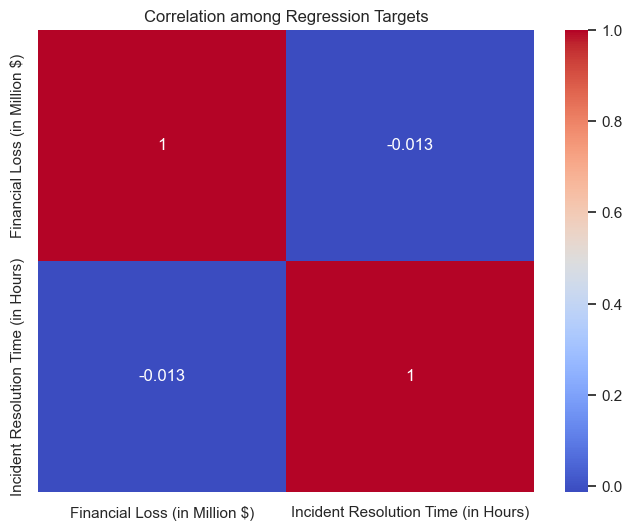

In [6]:
# Cell 7: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[regression_targets].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation among Regression Targets')
plt.show()

C:\Users\0WNER\AppData\Local\Temp\ipykernel_10568\3384256747.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', estimator='mean', ci=None)


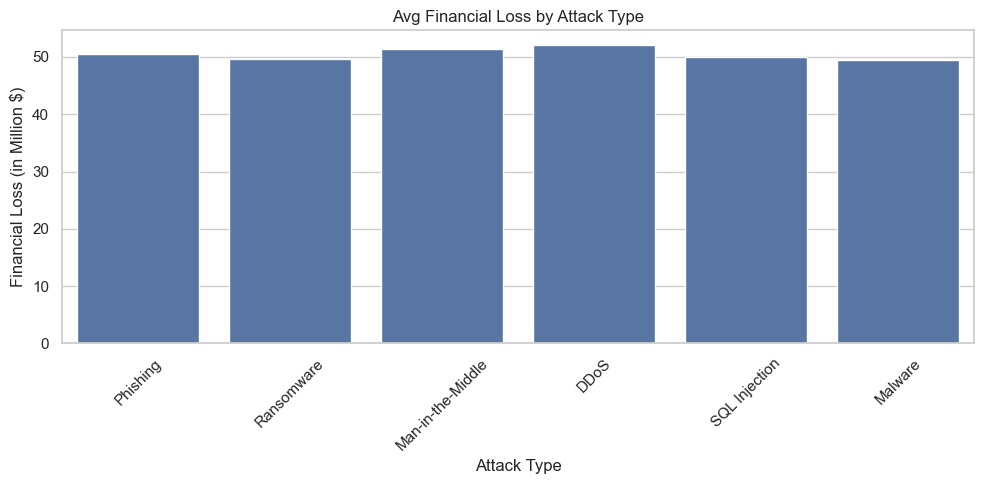

C:\Users\0WNER\AppData\Local\Temp\ipykernel_10568\3384256747.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', estimator='mean', ci=None)


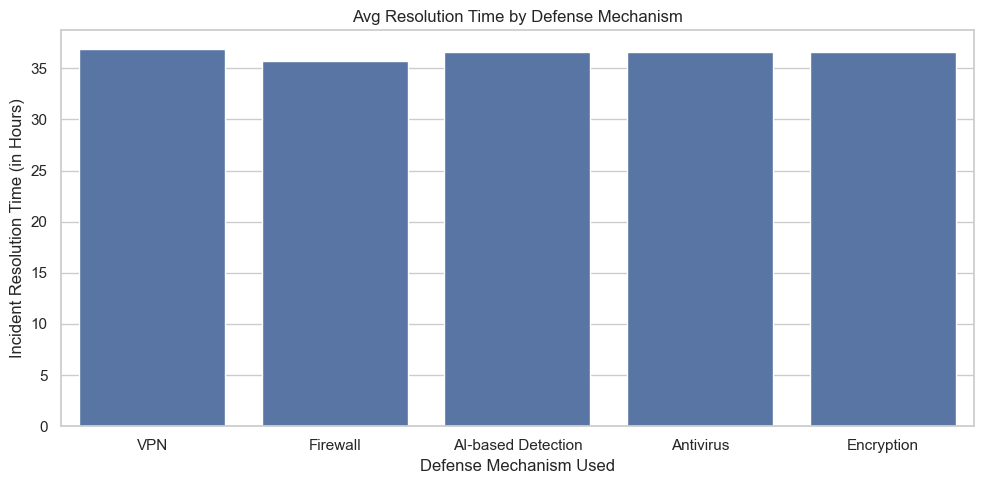

In [7]:
# Cell 8: Grouped insights (optional)
# Average Financial Loss per Attack Type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Attack Type', y='Financial Loss (in Million $)', estimator='mean', ci=None)
plt.title('Avg Financial Loss by Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Avg Resolution Time by Defense Mechanism
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Defense Mechanism Used', y='Incident Resolution Time (in Hours)', estimator='mean', ci=None)
plt.title('Avg Resolution Time by Defense Mechanism')
plt.tight_layout()
plt.show()